In [1]:
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite

model = read_sbml_model('Models/yeast8.xml')

In [2]:
xyodict = {1: "r_2104", # xylitol transport
           2: "r_1719", # D-xylose transport
           3: "r_1093", # xylose reductase
           4: "r_1092", # xylitol dehydrogenase
           5: "r_0889", # 6-phosphogluconate dehydrogenase
           6: "r_0466", # Glucose-6-phosphate dehydrogenase
           7: "r_1718", # D-xylose exchange
          }

### Glucose + L-leucine medium composition

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the range of glucose concentrations to test
glucose_concentrations = list(range(1, 701, 50))

# Prepare a list to store the results
results_list = []

# Loop through each glucose concentration and run the model
for glucose in glucose_concentrations:
    with model:
        # Adjust medium according to the current glucose concentration
        medium = model.medium
        medium['r_1714'] = glucose  
        model.medium = medium

        # Run the optimization for growth
        growth = model.optimize().objective_value
        glc_uptake_flux = model.reactions.r_1714.flux 
        max_growth = growth / (-1*glc_uptake_flux)

        # Run the optimization for isoamyl acetate productivity
        model.objective = model.reactions.r_1180  
        isoamyl_acetate_production = model.optimize().objective_value
        glc_uptake_flux = model.reactions.r_1714.flux 
        max_isoamyl_acetate_production = isoamyl_acetate_production / (-1*glc_uptake_flux)

        # Append the results to the list
        results_list.append({
            'Glucose_Concentration': glucose,
            'Growth': max_growth,
            'Isoamyl_Acetate_Productivity': max_isoamyl_acetate_production
        })

# Convert the list of results to a DataFrame
results_df2 = pd.DataFrame(results_list)




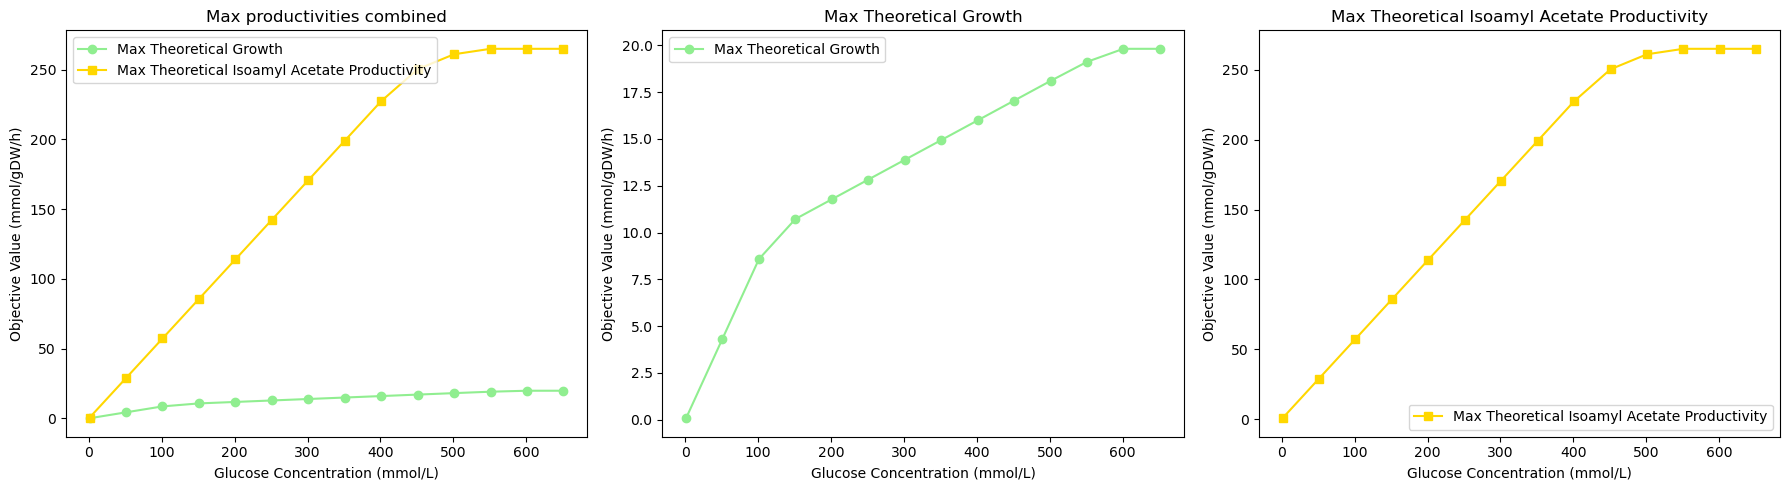

In [20]:
# Plotting the combined graph, growth only, and isoamyl acetate productivity only
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Combined graph
axes[0].plot(results_df2['Glucose_Concentration'], results_df['Growth'], color='lightgreen', label='Max Theoretical Growth', marker='o')
axes[0].plot(results_df2['Glucose_Concentration'], results_df['Isoamyl_Acetate_Productivity'], color='gold', label='Max Theoretical Isoamyl Acetate Productivity', marker='s')
axes[0].set_xlabel('Glucose Concentration (mmol/L)')
axes[0].set_ylabel('Objective Value (mmol/gDW/h)')
axes[0].set_title('Max productivities combined')
axes[0].legend()

# Growth only graph
axes[1].plot(results_df2['Glucose_Concentration'], results_df['Growth'], color='lightgreen', label='Max Theoretical Growth', marker='o')
axes[1].set_xlabel('Glucose Concentration (mmol/L)')
axes[1].set_ylabel('Objective Value (mmol/gDW/h)')
axes[1].set_title('Max Theoretical Growth')
axes[1].legend()

# Isoamyl acetate productivity only graph
axes[2].plot(results_df2['Glucose_Concentration'], results_df['Isoamyl_Acetate_Productivity'], color='gold', label='Max Theoretical Isoamyl Acetate Productivity', marker='s')
axes[2].set_xlabel('Glucose Concentration (mmol/L)')
axes[2].set_ylabel('Objective Value (mmol/gDW/h)')
axes[2].set_title('Max Theoretical Isoamyl Acetate Productivity')
axes[2].legend()

# Display the plots
plt.tight_layout()
plt.show()

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the range of glucose concentrations to test
glucose_concentrations = list(range(1, 701, 50))

# Prepare a list to store the results
results_list = []

# Loop through each glucose concentration and run the model
for glucose in glucose_concentrations:
    with model:
        # Adjust medium according to the current glucose concentration
        medium = model.medium
        medium['r_1714'] = glucose  
        model.medium = medium

        # Run the optimization for growth
        growth = model.optimize().objective_value

        # Run the optimization for isoamyl acetate productivity
        model.objective = model.reactions.r_1180  
        isoamyl_acetate_production = model.optimize().objective_value

        # Append the results to the list
        results_list.append({
            'Glucose_Concentration': glucose,
            'Growth': growth,
            'Isoamyl_Acetate_Productivity': isoamyl_acetate_production
        })

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results_list)


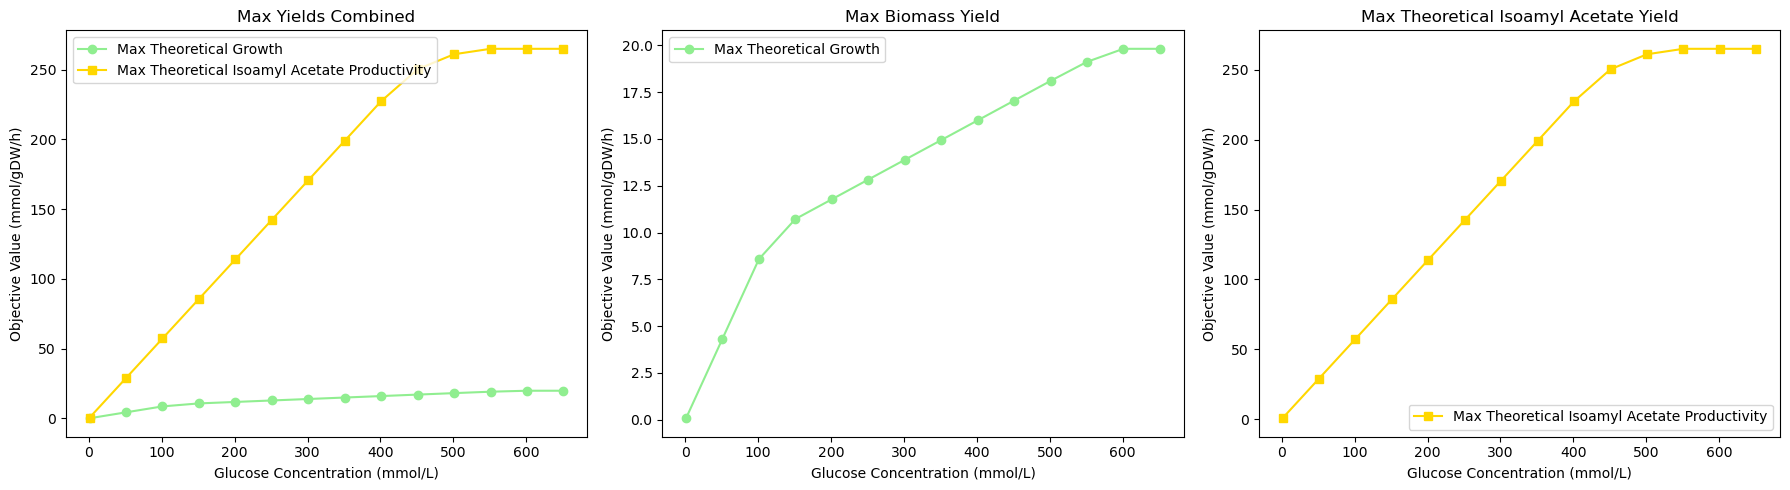

In [19]:
# Plotting the combined graph, growth only, and isoamyl acetate productivity only
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Combined graph
axes[0].plot(results_df['Glucose_Concentration'], results_df['Growth'], color='lightgreen', label='Max Theoretical Growth', marker='o')
axes[0].plot(results_df['Glucose_Concentration'], results_df['Isoamyl_Acetate_Productivity'], color='gold', label='Max Theoretical Isoamyl Acetate Productivity', marker='s')
axes[0].set_xlabel('Glucose Concentration (mmol/L)')
axes[0].set_ylabel('Objective Value (mmol/gDW/h)')
axes[0].set_title('Max Yields Combined')
axes[0].legend()

# Growth only graph
axes[1].plot(results_df['Glucose_Concentration'], results_df['Growth'], color='lightgreen', label='Max Theoretical Growth', marker='o')
axes[1].set_xlabel('Glucose Concentration (mmol/L)')
axes[1].set_ylabel('Objective Value (mmol/gDW/h)')
axes[1].set_title('Max Biomass Yield')
axes[1].legend()

# Isoamyl acetate productivity only graph
axes[2].plot(results_df['Glucose_Concentration'], results_df['Isoamyl_Acetate_Productivity'], color='gold', label='Max Theoretical Isoamyl Acetate Productivity', marker='s')
axes[2].set_xlabel('Glucose Concentration (mmol/L)')
axes[2].set_ylabel('Objective Value (mmol/gDW/h)')
axes[2].set_title('Max Theoretical Isoamyl Acetate Yield')
axes[2].legend()

# Display the plots
plt.tight_layout()
plt.show()
